In [258]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

sns.set_style('darkgrid')

In [259]:
df = pd.read_csv('HRDataset.csv')
df.drop(['LastPerformanceReview_Date','DaysLateLast30'],axis=1,inplace=True)
df.dropna(thresh=2,inplace=True)
pd.set_option('display.max_columns', None)
df.head()


,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,PayRate,Termd,PositionID,Position,State,Zip,DOB,Sex,MaritalDesc,CitizenDesc,HispanicLatino,RaceDesc,DateofHire,DateofTermination,TermReason,EmploymentStatus,Department,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount
0,"Brown, Mia",1.103024e+09,1.0,1.0,0.0,1.0,1.0,3.0,1.0,28.50,0.0,1.0,Accountant I,MA,1450.0,11/24/87,F,Married,US Citizen,No,Black or African American,10/27/2008,NaN,N/A - still employed,Active,Admin Offices,Brandon R. LeBlanc,1.0,Diversity Job Fair,Fully Meets,2.04,2.0,6.0
1,"LaRotonda, William",1.106027e+09,0.0,2.0,1.0,1.0,1.0,3.0,0.0,23.00,0.0,1.0,Accountant I,MA,1460.0,04/26/84,M,Divorced,US Citizen,No,Black or African American,1/6/2014,NaN,N/A - still employed,Active,Admin Offices,Brandon R. LeBlanc,1.0,Website Banner Ads,Fully Meets,5.00,4.0,4.0
2,"Steans, Tyrone",1.302053e+09,0.0,0.0,1.0,1.0,1.0,3.0,0.0,29.00,0.0,1.0,Accountant I,MA,2703.0,09/01/86,M,Single,US Citizen,No,White,9/29/2014,NaN,N/A - still employed,Active,Admin Offices,Brandon R. LeBlanc,1.0,Internet Search,Fully Meets,3.90,5.0,5.0
3,"Howard, Estelle",1.211051e+09,1.0,1.0,0.0,1.0,1.0,3.0,0.0,21.50,1.0,2.0,Administrative Assistant,MA,2170.0,09/16/85,F,Married,US Citizen,No,White,2/16/2015,04/15/15,NaN,Terminated for Cause,Admin Offices,Brandon R. LeBlanc,1.0,Pay Per Click - Google,Fully Meets,3.24,3.0,4.0
4,"Singh, Nan",1.307060e+09,0.0,0.0,0.0,1.0,1.0,3.0,0.0,16.56,0.0,2.0,Administrative Assistant,MA,2330.0,05/19/88,F,Single,US Citizen,No,White,5/1/2015,NaN,N/A - still employed,Active,Admin Offices,Brandon R. LeBlanc,1.0,Website Banner Ads,Fully Meets,5.00,3.0,5.0


1. Czy istnieje zależność pomiędzy tym, kto jest bezpośrednim przełożonym (ManagerName, ManagerID) danego pracownika, a oceną wydajności pracy (PerformanceScore)? Na podstawie poniższych dwoch wykresów stiwuerdzam,że jest kilka osób, które mają swój styl oceny i od tego stylu może zależeć ocena pracownicza. Interesującym przypadkiem jest np. Brannon Miller, który wystawia wyjątkowo dużo ocen wybitnych, tj "exceeds", jak i tych najsurowszych, tj "PIP". jako jedyny ma też spory udział innych ocen. Innymi słowy - ocenia różnorodnie. Kilka osób wystawia w wiekszosci oceny "Fully Meets" nie wystawiajac przy tym za wiele ocen skrajnych: np. Board of Directors (pewnie grupa szefów), Brandon R. LeBlanc, Brian Champaigne. Simon Roupe wystawia oceny tylk odobre - Fully Meets albo Exeeds. John Smith wystawia oceny albo b.dobre (Fully Meets),albo najsłabsze (PIP). Innych ocen nie wystawia.

Każdego managera można ocenić pod tym względem inaczej, każdy ma swoj styl oceny. 

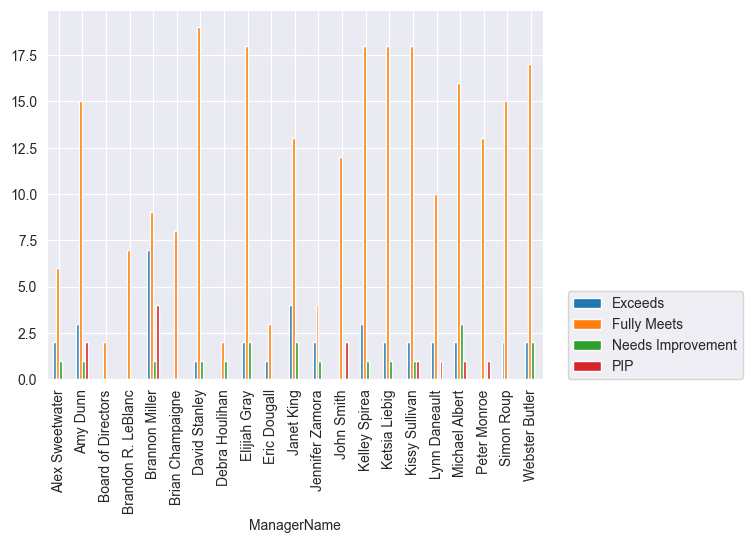

In [260]:
zad1 = pd.crosstab(df['ManagerName'], df['PerformanceScore'])
axes1 = zad1.plot.bar()
axes1.legend(loc=(1.05,0.0))

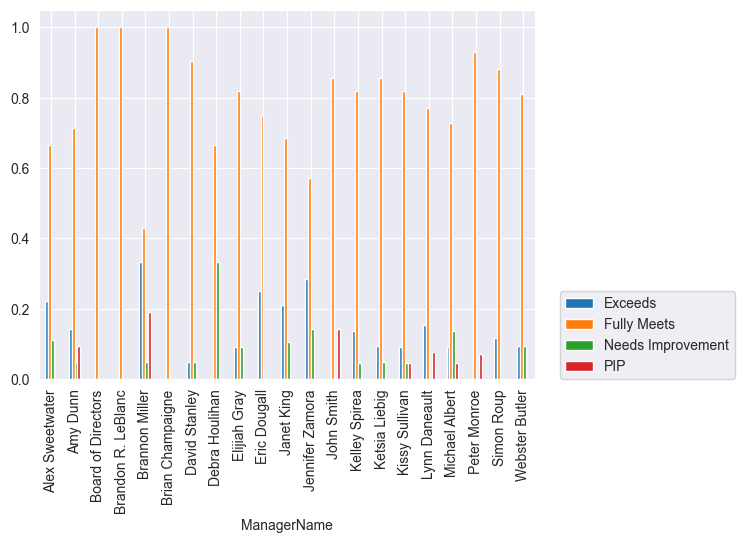

In [261]:
df_MP = pd.crosstab(df['ManagerName'],df['PerformanceScore'],normalize='index')
df_MP
axes = df_MP.plot.bar()
axes.legend(loc=(1.05,0.0))

2. Jakie źródła pozyskania pracownika (Recruitment Source) są najlepsze, jeśli zależy nam na jak najdłuższym stażu pracowników?

In [262]:
import datetime as dt
df['DOB'] = pd.to_datetime(df['DOB'],format='%m/%d/%y')

# Funkcja potrzebna do niepoprawnej konwersji lat sprzed 1970 roku. Lata sprzed 1970 konwertują sie w Pandas na sto lat więcej.

def days_of_future_past(date,chk_y=dt.datetime(2019,9,27).year):
    return date.replace(year=date.year-100) if date.year > chk_y else date
df['DOB'] = pd.to_datetime(df['DOB'],format='%m/%d/%y').map(days_of_future_past)


df['DateofTermination'] = pd.to_datetime(df['DateofTermination'],format='%m/%d/%y')
df['DateofHire'] = pd.to_datetime(df['DateofHire'],format='%m/%d/%Y')

def count_seniority(row):

    if pd.isnull(row['DateofTermination']):
        end_date = dt.datetime(2019,9,27)
    else:
        end_date = row['DateofTermination']

    return (end_date - row['DateofHire'])/np.timedelta64(1,'Y')
df['Seniority'] = df.apply(lambda row: count_seniority(row),axis=1)

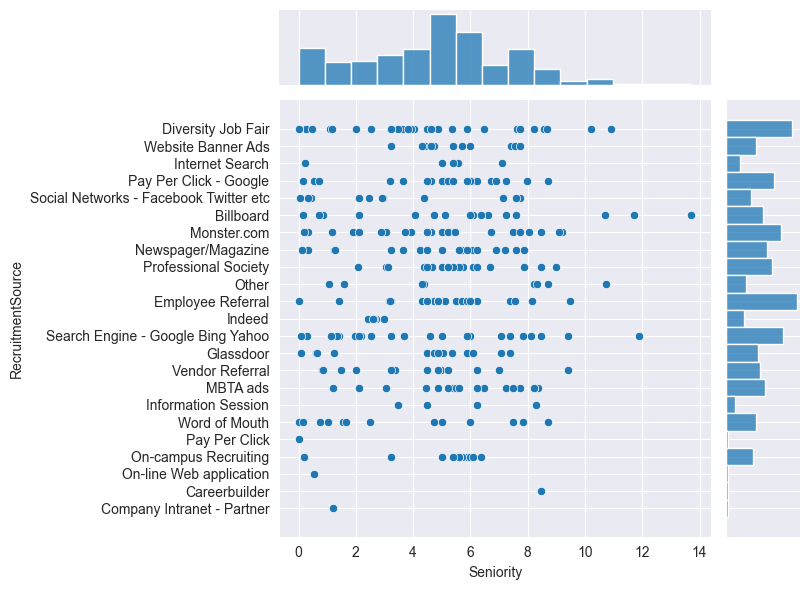

In [263]:
sns.jointplot(x='Seniority',y='RecruitmentSource',data=df)


<AxesSubplot: xlabel='Seniority', ylabel='RecruitmentSource'>

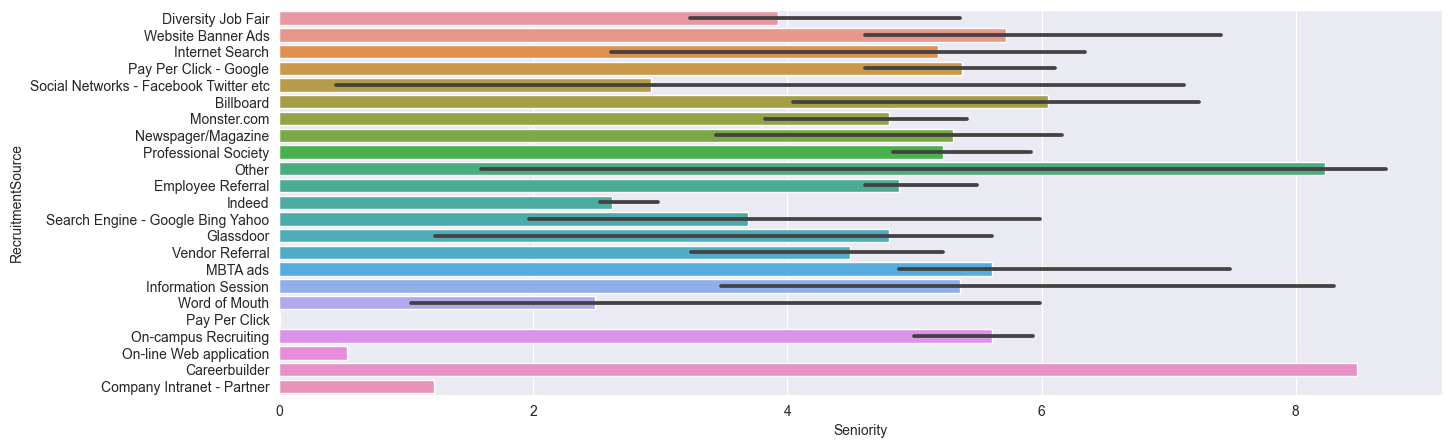

In [264]:
plt.figure(figsize=(15,5))
sns.barplot(x='Seniority',y='RecruitmentSource',data=df,estimator=np.median)

<AxesSubplot: xlabel='Seniority', ylabel='RecruitmentSource'>

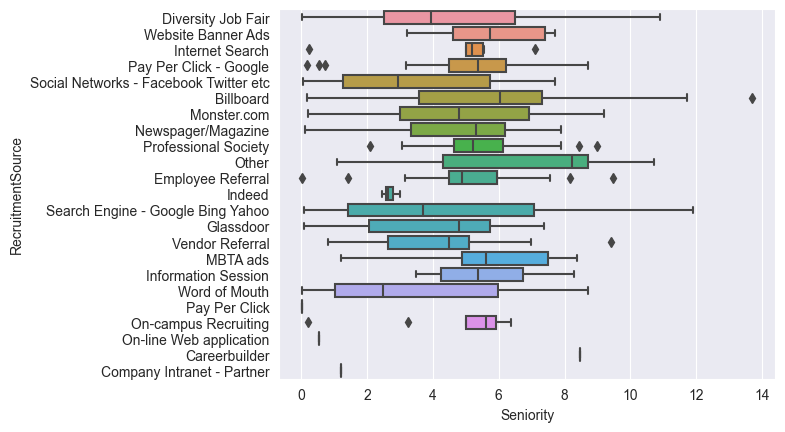

In [265]:
sns.boxplot(x='Seniority',y='RecruitmentSource',data=df)

INTERPRETACJA: Za długi staż uznałam przepracowanych 8 lat i więcej. Dla tego przedziału najwięcej osób zostało zatrudnionych w sposób ..."Other". Poza tą kategorią wyniki ponad 8 lat stażu to Diversity Job Fair, Billboard, Searching Engine - Google Bing Yahoo. Jedyna osoba zatrudniona poprzez Careerbuilder ma również staż pracy ponad 8 lat.

3. Czy stan cywilny (MartialDesc) pracownika koreluje w jakikolwiek sposób z zadowoleniem z pracy (EmpSatisfaction)? Jeśli chodzi o ŚREDNI poziom zadowolenia danej grupy poziom jest podobny i oscyluje wokół 4. Osoby owdowiałe są nieco bardziej zadowolone, natomiast osoby w związku małżeńskim lub w separacji - są zadowolone nieco mniej. Gdy przyjrzyymy się 
różnorodności odpowiedzi, zauważymy,że osoby rozwiedzione dają odpowiedzi między 4-5, osoby owdowiałe zazwyczaj 4. Pozostałe grupy poziom zadowolenia w wiekszości oceniają między 3 a 5.Osoby rozwiedzione nie wystawiają niskich ocen.

<AxesSubplot: xlabel='MaritalDesc', ylabel='EmpSatisfaction'>

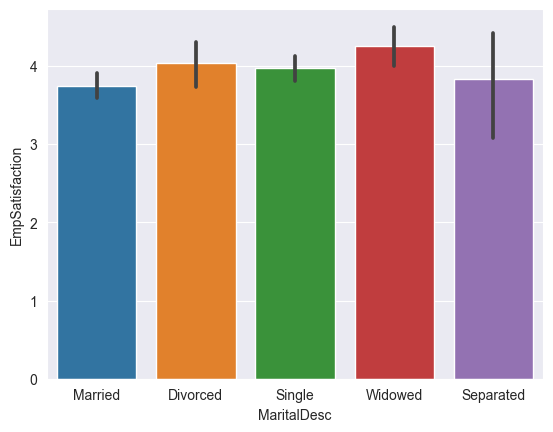

In [266]:
sns.barplot(x='MaritalDesc',y='EmpSatisfaction',data=df)

<AxesSubplot: xlabel='MaritalDesc', ylabel='EmpSatisfaction'>

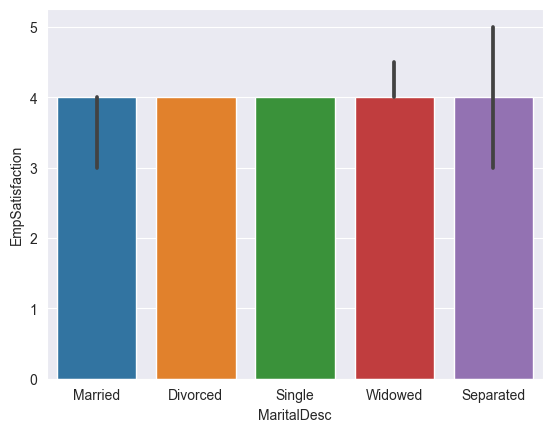

In [267]:
sns.barplot(x='MaritalDesc',y='EmpSatisfaction',data=df,estimator=np.median)

<AxesSubplot: xlabel='MaritalDesc', ylabel='EmpSatisfaction'>

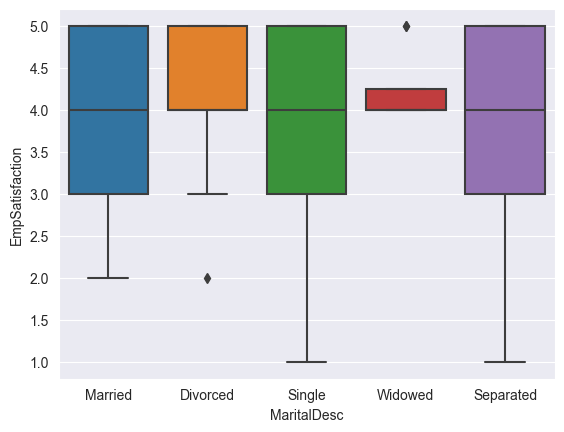

In [268]:
sns.boxplot(x='MaritalDesc',y='EmpSatisfaction',data=df)

4. Jak wygląda struktura wieku aktualnie zatrudnionych pracowników?

Pracownicy to osoby z przedziału 21-69 lat. 
Osoby w przedziale 29-43 lat to najliczniejsza grupa wiekowa.

In [269]:
def count_age(row):

    if pd.isnull(row['DateofTermination']):
        end_date = dt.datetime(2019,9,27)
    else:
        end_date = row['DateofTermination']

    return round((end_date - row['DOB'])/np.timedelta64(1,'Y'),0)
df['Age'] = df.apply(lambda row: count_age(row),axis=1)
df = df.astype({'Age':'int'})

<AxesSubplot: xlabel='Age', ylabel='Count'>

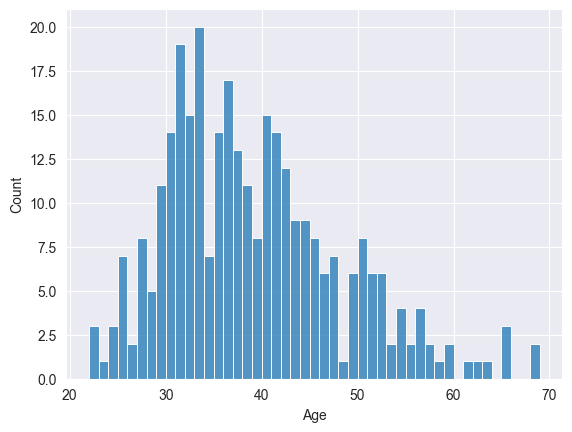

In [270]:
sns.histplot(x='Age',data=df,binwidth=1)

5. Czy starsi pracownicy pracują nad większą liczbą specjalnych projektów niż młodsi pracownicy?

Najwięcej projektów (powyżej czterech) dostają pracownicy między 26 a 54 r.ż.

<Figure size 3500x3500 with 0 Axes>

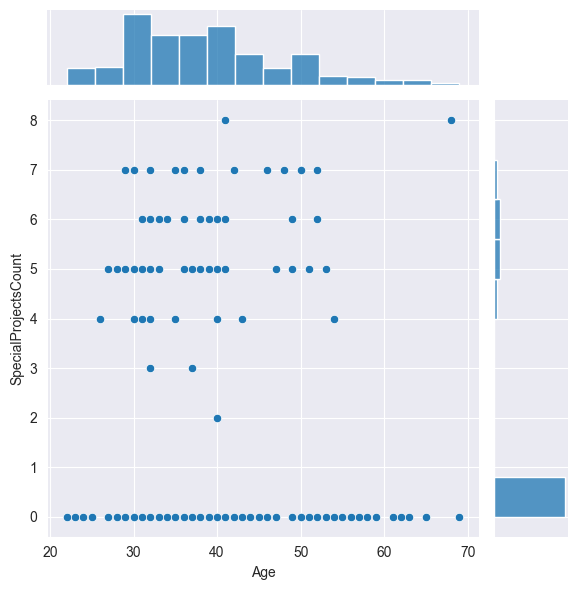

In [271]:
plt.figure(figsize=(35,35))
sns.jointplot(x='Age',y='SpecialProjectsCount',data=df)

<AxesSubplot: xlabel='SpecialProjectsCount', ylabel='Age'>

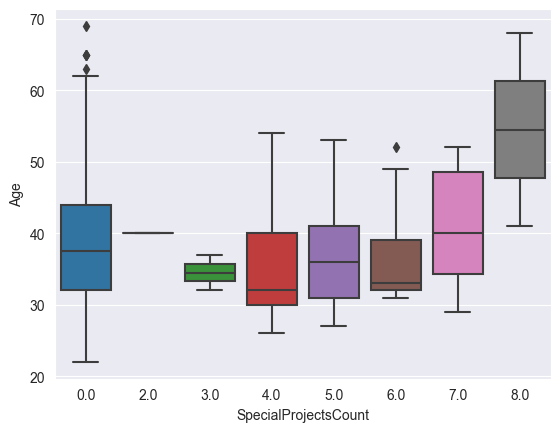

In [272]:
sns.boxplot(x='SpecialProjectsCount',y='Age',data=df)

In [273]:
pd.crosstab(df['SpecialProjectsCount'], df['Age'],normalize='index')

Age,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,61,62,63,65,68,69
SpecialProjectsCount,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0.0,0.012397,0.004132,0.012397,0.028926,0.000000,0.028926,0.016529,0.037190,0.045455,0.057851,0.024793,0.053719,0.024793,0.049587,0.057851,0.045455,0.028926,0.024793,0.041322,0.045455,0.045455,0.033058,0.03719,0.033058,0.020661,0.020661,0.000000,0.016529,0.024793,0.020661,0.016529,0.004132,0.012397,0.008264,0.016529,0.008264,0.004132,0.008264,0.004132,0.004132,0.004132,0.012397,0.0,0.004132
2.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
3.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,0.000000,0.000000,0.000000,0.000000,0.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
4.0,0.000000,0.000000,0.000000,0.000000,0.222222,0.000000,0.000000,0.000000,0.111111,0.111111,0.111111,0.000000,0.000000,0.111111,0.000000,0.000000,0.000000,0.000000,0.111111,0.000000,0.000000,0.111111,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.111111,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
5.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.047619,0.047619,0.047619,0.047619,0.142857,0.047619,0.095238,0.000000,0.000000,0.047619,0.047619,0.047619,0.047619,0.047619,0.047619,0.000000,0.000000,0.00000,0.000000,0.000000,0.095238,0.000000,0.047619,0.000000,0.047619,0.000000,0.047619,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
6.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.047619,0.238095,0.238095,0.047619,0.000000,0.047619,0.000000,0.095238,0.047619,0.095238,0.047619,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.047619,0.000000,0.000000,0.047619,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
7.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.083333,0.083333,0.000000,0.083333,0.000000,0.000000,0.083333,0.083333,0.000000,0.083333,0.000000,0.000000,0.000000,0.083333,0.000000,0.00000,0.000000,0.083333,0.000000,0.083333,0.000000,0.166667,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
8.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.5,0.000000
